In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


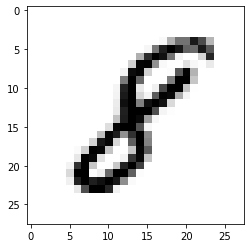

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
print(type(x_train[7777]))

<class 'numpy.ndarray'>


In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 34s 562us/step - loss: 0.2101 - accuracy: 0.9368
Epoch 2/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0849 - accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.0582 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0446 - accuracy: 0.9858
Epoch 5/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0359 - accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0287 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.0239 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0214 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0195 - accuracy: 0.9934
Epoch 10/10
60000/60000 [============

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 187us/step


[0.06076548418843795, 0.9858999848365784]

In [0]:
from google.colab import files
image = files.upload()

Saving image2.png to image2.png


In [0]:
ls

image2.png  sample_data/


In [0]:
import matplotlib.image as mpimg
img = mpimg.imread('image2.png')

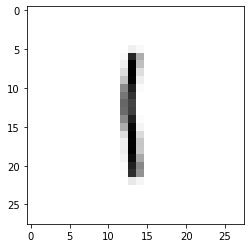

In [0]:
plt.imshow(img.reshape(28, 28),cmap='Greys')

In [0]:
pred = model.predict(img.reshape(1, 28, 28, 1))

In [0]:
print(pred.argmax())

1


In [0]:
model.save('network.h5')

In [0]:
files.download('network.h5')